In [60]:
import numpy as np
import pandas as pd
# Importation de pylot 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

dfAccident2018lieux = pd.read_csv("données/2018/lieux-2018.csv",",",encoding='utf-8',low_memory=False)
dfAccident2018usagers = pd.read_csv("données/2018/usagers-2018.csv",",",encoding='utf-8',low_memory=False)
dfAccident2018vehicules = pd.read_csv("données/2018/vehicules-2018.csv",",",encoding='utf-8',low_memory=False)
dfAccident2018caracteristiques = pd.read_csv("données/2018/caracteristiques-2018.csv",",",encoding='latin-1',low_memory=False)

# dfAccident2018caracteristiques.rename(columns={"an":"annee","com":"code_commune"})
# dfAccident2018caracteristiques['date'] = "2"+ str(dfAccident2018caracteristiques['an']) + '/'+str(dfAccident2018caracteristiques['mois'])+ "/" + str(dfAccident2018caracteristiques['jour'])
# dfAccident2018caracteristiques.date.replace(year = dfAccident2018caracteristiques.an)
dfAccident2018caracteristiques.an = dfAccident2018caracteristiques.an + 2000

def replace_intersection(df):
    df.int = df.int.replace(1, 'Hors Intersection').replace(2, 'Intersection en X').replace(3, 'Intersection en T').replace(4, 'Intersection en Y').replace(5, 'Intersection à plus de 4 branches').replace(6, 'Giratoire').replace(7, 'Place').replace(8, 'Passsage à niveau').replace(9, 'Autre intersection')
    return df

def replace_conditions_atmo(df):
    df.atm = df.atm.replace(1,'Normale').replace(2,'Pluie Légère').replace(3,'Pluie Forte').replace(4,'Neig - grêle').replace(5,'Bouillard - Fumée').replace(6,'Vent fort - Tempête').replace(7,'Temps éblouissant').replace(8,'Temps couvert').replace(9,'Autre')
    return df

def replace_collision(df):
    df.col = df.col.replace(1,'Deux véhicules - frontale').replace(2,'Deux véhicules – par l’arrière').replace(3,'Deux véhicules – par le coté').replace(4,'Trois véhicules et plus – en chaîne').replace(5,'Trois véhicule et plus - collisions multiples').replace(6,'Autre collision').replace(7,'Sans collision')
    return df

def replace_gps(df):
    df.gps  = df.gps.replace('M','Métropole').replace('A','Antilles').replace('G','Guyane').replace('R','Réunion').replace('Y','Mayotte')
    return df

def replace_adr(df):
    df.adr = [str(x).upper() for x in df.adr]
    return df

def replace_lum(df):
    df.lum  = df.lum.replace(1,'Plein jour').replace(2,'Crépuscule ou aube').replace(3,'Nuit sans éclairage public').replace(4,'Nuit avec éclairage public non allumé').replace(5,'Nuit avec éclairage public allumé')
    return df

def gen_date(df):
    df['date'] = [datetime.datetime(df.an.iloc[i],df.mois.iloc[i],df.jour.iloc[i]) for i in range(len(df.an))]
    return df

def replace_agglo(df):
    df['agg'] = df['agg'].replace(1,'Hors agglomération').replace(2,'En agglomération')
    return df

def replace_com(df):
    list_com = [[i for i in str(x)] for x in df.com]
    for i in range(len(list_com)):
        if(len(list_com[i]) == 1):
            list_com[i].insert(0, "0")
        if(len(list_com[i]) == 2):
            list_com[i].insert(0, "0")
        list_com[i] = list_com[i][0] +list_com[i][1] +list_com[i][2] 
    df.com = list_com
    return df 

def replace_dep(df):
    list_dep = [[i for i in str(x)] for x in df.dep]
    for i in range(len(list_dep)):
        list_dep[i] = list_dep[i][0] +list_dep[i][1] + df.com.iloc[i]
    df.dep = list_dep
    return df 


dfAccident2018caracteristiques = gen_date(replace_lum(replace_agglo(replace_adr(replace_gps(replace_intersection(replace_conditions_atmo(replace_collision(dfAccident2018caracteristiques))))))))
# print(dfAccident2018caracteristiques.agg)

dfAccident2018caracteristiques = replace_dep(replace_com(dfAccident2018caracteristiques))
dfAccident2018caracteristiques = dfAccident2018caracteristiques.rename(columns={"agg":"agglo","dep":"code_postal"})
dfAccident2018caracteristiques = dfAccident2018caracteristiques.drop(columns=['mois','jour','hrmn','an','com'])
dfAccident2018caracteristiques = dfAccident2018caracteristiques.rename(index=dfAccident2018caracteristiques.Num_Acc)
mask = dfAccident2018caracteristiques.code_postal == '92014'
dfAccident2018caracteristiques[mask]

,Num_Acc,lum,agglo,int,atm,col,adr,gps,lat,long,code_postal,date
201800037138,201800037138,Nuit avec éclairage public allumé,En agglomération,Intersection en T,Normale,Deux véhicules – par le coté,"1, GENERAL LECLERC (AV.)",Métropole,4878789.0,231878.0,92014,2018-01-24
201800037140,201800037140,Plein jour,En agglomération,Intersection en X,Normale,Autre collision,"63, GENERAL LECLERC (AV.",Métropole,4878225.0,231667.0,92014,2018-02-25
201800037143,201800037143,Plein jour,En agglomération,Intersection en X,Normale,Autre collision,"43, MARECHAL JOFFRE (BD",Métropole,4878301.0,231529.0,92014,2018-01-19
201800037144,201800037144,Plein jour,En agglomération,Hors Intersection,Normale,Deux véhicules – par le coté,"175, GENERAL LECLERC (AV",Métropole,4877272.0,231277.0,92014,2018-03-14
201800037150,201800037150,Plein jour,En agglomération,Hors Intersection,Normale,Autre collision,"3, LAFAYETTE (ALLEE)",Métropole,4878874.0,231391.0,92014,2018-05-22
201800037151,201800037151,Plein jour,En agglomération,Intersection en T,Normale,Deux véhicules – par le coté,"75, BIEVRE (RUE DE LA)",Métropole,4878007.0,232387.0,92014,2018-05-14
201800037157,201800037157,Plein jour,En agglomération,Intersection en X,Normale,Deux véhicules – par le coté,FONTENAY (RUE),Métropole,4878489.0,230974.0,92014,2018-07-06
201800037160,201800037160,Plein jour,En agglomération,Giratoire,Normale,Deux véhicules – par l’arrière,PORT GALAND (RUE DU),Métropole,4878941.0,231385.0,92014,2018-07-12
201800037168,201800037168,Nuit avec éclairage public allumé,En agglomération,Place,Normale,Deux véhicules – par l’arrière,MARECHAL JOFFRE (BD DU),Métropole,4877668.0,231368.0,92014,2018-08-26
201800037170,201800037170,Plein jour,En agglomération,Intersection en X,Normale,Deux véhicules – par le coté,GENERAL LECLERC (AV.) (5,Métropole,4878242.0,231643.0,92014,2018-09-07


In [1]:
'''
    Normalisation des données de type usagers
'''

# Replace les valeurs de place
def replace_place(df):
    df.place  = df.place.replace(1,'Conducteur').replace(2,'Passager Avant Droite').replace(3,'Passager Arrière Droite').replace(4,'Passager Arrière Gauche').replace(5,'Passager Arrière Central').replace(6,'Passager Avant Central').replace(7,'Passager Milieu Gauche').replace(8,'Passager Milieu Central').replace(9,'Passager Milieu Droite')
    return df

# Remplace les valeyrs de catégorie d'usager
def replace_catu(df):
    df.catu = df.catu.replace(1,'Conducteur').replace(2,'Passager').replace(3,'Piéton').replace(4,'Piéton en rollet ou trotinette')
    return df

# Remplace les valeurs de gravité de l'accident
def replace_grav(df):
    df.grav = df.grav.replace(1,'Indemne').replace(2,'Tué').replace(3,'Hospitalisation').replace(4,'Blessé léger')
    return df

# Remplace le sexe de l'usager
def replace_sexe(df):
    df.sexe = df.sexe.replace(1,'Masculin').replace(2,'Féminin')
    return df

# Remplace le motif du déplacement au moment de l'accident
def replace_trajet(df):
    df.trajet = df.trajet.replace(0,'Inconnu').replace(1,'Domicile - travail').replace(2,'Domicile - école').replace(3,'Courses - achats').replace(4,'Utilisation professionnelle').replace(5,'Promenade - loisirs').replace(9,'Autres')
    return df

# Remplace la localisation du piétion
def replace_locp(df):
    df.locp = df.locp.replace(0,'Pas de piéton').replace(1,'Sur la chaussée à + de 50 m du passager piéton').replace(2,'Sur la chaussée à - de 50 du passage piétion').replace(3,'Sur un passage piéton sans signalisation lumineuse').replace(4,'Sur un passage piéton avec signalisation lumineuse').replace(5,'Sur un trottoir').replace(6,'Sur accotement').replace(7,'Sur refuge ou BAU').replace(8,'Contre allée')
    return df

# Repmlace les valeurs de l'action du piéton
def replace_actp(df):
    df.actp = df.actp.replace(0,'non renseigné ou sans objet').replace(1,'Sens véhicule heurtant').replace(2,'Sens inverse du véhicule').replace(3,'Traversant').replace(4,'Masqué').replace(5,'Jouant - Courant').replace(6,'Avec animal').replace(9,'Autre')
    return df

# Repmlace les valeurs de l'action du piéton
def replace_etatp(df):
    df.etatp = df.etatp.replace(1,'Seul').replace(2,'Accompagné').replace(3,'En groupe').replace(0,'Inconnu')
    return df

dfAccident2018usagers = dfAccident2018usagers.fillna(value={"place":"Inconnu","actp":0,"locp":"Inconnu","etatp":"Inconnu","an_nais":0.0})
dfAccident2018usagers = replace_etatp(replace_sexe(replace_trajet(replace_locp(replace_grav(replace_catu(replace_place(replace_actp(dfAccident2018usagers))))))))
dfAccident2018usagers
mask = dfAccident2018usagers.Num_Acc == "201800000232"
dfAccident2018usagers[mask]

NameError: name 'dfAccident2018usagers' is not defined

In [4]:
# Replacement Int Rubrique Lieux 

# Replacement catr (Categorie de route)
def replace_catr(df):
    df.catr = df.catr.replace(1, 'Autoroute').replace(2, 'Route Nationale').replace(3, 'Route Départementale').replace(4, 'Voie Communale').replace(5, 'Hors réseau public').replace(6, ' Parc de stationnement ouvert à la circulation publique').replace(9, 'Autre')
    return df
# Replacement circ (Régime de circulation)
def replace_circ(df):
    df.circ = df.circ.replace(1,'A sens unique').replace(2,'Bidirectionnelle').replace(3,'A chaussées séparées').replace(4,'Avec voies d’affectation variable')
    return df
# Replacement vosp (Existence d’une voie réservée)
def replace_vosp(df):
    df.vosp = df.vosp.replace(0,'Aucune voie réservée').replace(1,'Piste cyclable ').replace(2,'Banque cyclable').replace(3,'Voie réservée')
    return df
# Replacement prof (décrit la déclivité de la route à l'endroit de l'accident)
def replace_prof(df):
    df.prof = df.prof.replace(1,'Plat').replace(2,'Pente').replace(3,'Sommet de côte').replace(4,'Bas de côte')
    return df
# Replacement plan (Tracé en plan)
def replace_plan(df):
    df.plan = df.plan.replace(1,'Partie rectiligne').replace(2,'En courbe à gauche').replace(3,'En courbe à droite').replace(4,'En « S »')
    return df
# Replacement surf (Etat de la surface)
def replace_surf(df):
    df.surf = df.surf.replace(1,'Normale').replace(2,'Mouillée').replace(3,'Flaques').replace(4,'Inondée').replace(5,'Enneigée').replace(6,'Boue').replace(7,'Verglacée').replace(8,'Corps gras - Huile').replace(9,'Autre')
    return df
# Replacement infra (Aménagement - Infrastructure)
def replace_infra(df):
    df.infra = df.infra.replace(1,'Souterrain - tunnel').replace(2,'Pont - autopont').replace(3,'Bretelle d’échangeur ou de raccordement').replace(4,'Voie ferrée').replace(5,'Carrefour aménagé').replace(6,'Zone piétonne').replace(7,' Zone de péage')
    return df
# Replacement situ (Situation de l’accident :)
def replace_situ(df):
    df.situ = df.situ.replace(1,' Sur chaussée').replace(2,'Sur bande d’arrêt d’urgence ').replace(3,'Sur accotement').replace(4,'Sur trottoir').replace(5,'Sur piste cyclable')
    return df

dfAccident2018lieux = replace_catr(replace_circ(replace_infra(replace_plan(replace_prof(replace_situ(replace_surf(replace_surf(replace_vosp(dfAccident2018lieux)))))))))
dfAccident2018lieux.rename(index=dfAccident2018lieux.Num_Acc)


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
201800000001,201800000001,Route Départementale,41,NaN,C,Bidirectionnelle,2.0,NaN,NaN,Aucune voie réservée,Plat,En courbe à droite,NaN,NaN,Normale,0,Sur chaussée,0.0
201800000002,201800000002,Voie Communale,41,NaN,D,Bidirectionnelle,2.0,NaN,NaN,Aucune voie réservée,Plat,En courbe à gauche,NaN,NaN,Normale,0,Sur chaussée,0.0
201800000003,201800000003,Route Départementale,39,NaN,D,Bidirectionnelle,2.0,NaN,NaN,Aucune voie réservée,Plat,Partie rectiligne,NaN,NaN,Normale,0,Sur chaussée,0.0
201800000004,201800000004,Route Départementale,39,NaN,NaN,Bidirectionnelle,2.0,NaN,NaN,Aucune voie réservée,Plat,Partie rectiligne,NaN,NaN,Normale,0,Sur chaussée,0.0
201800000005,201800000005,Voie Communale,NaN,NaN,NaN,A sens unique,1.0,NaN,NaN,Aucune voie réservée,Plat,Partie rectiligne,NaN,NaN,Normale,0,Sur chaussée,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201800057779,201800057779,Voie Communale,NaN,NaN,NaN,A sens unique,1.0,0.0,0.0,Aucune voie réservée,Plat,Partie rectiligne,NaN,NaN,Normale,0,Sur accotement,0.0
201800057780,201800057780,Route Nationale,2,NaN,NaN,0,2.0,0.0,0.0,Aucune voie réservée,Plat,Partie rectiligne,NaN,NaN,Normale,0,Sur accotement,0.0
201800057781,201800057781,Route Nationale,1,NaN,NaN,Bidirectionnelle,2.0,0.0,0.0,Aucune voie réservée,Plat,Partie rectiligne,NaN,NaN,Normale,0,Sur accotement,0.0
201800057782,201800057782,Voie Communale,NaN,NaN,NaN,0,2.0,0.0,0.0,Aucune voie réservée,Pente,En courbe à gauche,NaN,NaN,Normale,0,Sur accotement,0.0


In [49]:
# Replacement Int Rubrique Véhicule 

# Replacement de la valeur du sens de circulation
def replace_senc(df):
    df.senc = df.senc.replace(0,'Inconnu').replace(1, 'Point Kilométrique ou Point Repère Routier ou Numéro d’adresse postale croissant').replace(2, 'Point Kilométrique ou Point Repère Routier ou Numéro d’adresse postale décroissant')
    return df

# Replacement de la valeur de l'obstacle
def replace_obs(df):
    df.obs = df.obs.replace(0, 'Aucun').replace(1, 'Véhicule en stationnement').replace(2, 'Arbre').replace(3, 'Glissière métallique').replace(4, 'Glissière béton').replace(5, 'Autre Glissière').replace(6, 'Bâtiment, mur, pile de pont').replace(7, 'Support de signalisation verticale ou poste d’appel d’urgence').replace(8, 'Poteau').replace(9, 'Mobilier urbain').replace(10, 'Parapet').replace(11, 'Ilot, refuge, borne haute').replace(12, 'Bordure de trottoir').replace(13, 'Fossé, talus, paroi rocheuse').replace(14, 'Autre obstacle fixe sur chaussée ').replace(15, 'Autre obstacle fixe sur trottoir ou accotement').replace(16, 'Sortie de chaussée sans obstacle').replace(2, 'Point Kilométrique ou Point Repère Routier ou Numéro d’adresse postale décroissant')
    return df

def replace_catv(df):
    df.catv = df.catv.replace(1, 'Bicyclette').replace(2, 'Cyclomoteur <50cm3').replace(3, 'Voiturette').replace(4, 'Scooter immatriculé').replace(5, 'Motocyclette').replace(6, 'Side-Car').replace(7, 'Véhicule Léger seul').replace(8, 'Véhicule léger + caravane').replace(9, 'Véhicule léger + remorque').replace(10, 'Véhicule Utilitaire seul').replace(11, 'Véhicule Utilitaire + caravane').replace(12, 'Véhicule Utilitaire + remorque').replace(13, 'Poids Lourd < 7.5T seul').replace(14, 'Poids Lourd > 7.5T seul').replace(15, 'Poids Lourd > 3.5T + remorque').replace(16, 'Tracteur Routier seul').replace(17, 'Tracteur routier + semi-remorque').replace(18, 'Transport en commun').replace(19, 'Tramway').replace(20, 'Engin spécial').replace(21, 'Tracteur agricole').replace(30, 'Scooter < 50 cm3').replace(31, 'Motocyclette > 50 cm3   et <= 125 cm3').replace(32, 'Scooter > 50 cm3 et <= 125 cm3').replace(33, 'Motocyclette > 125 cm3').replace(34, 'Scooter > 125 cm3').replace(35, 'Quad léger <= 50 cm3').replace(36, 'Quad léger > 50 cm3').replace(37, 'Autobus').replace(38, 'Autocar').replace(39, 'Train').replace(40, 'Tramway').replace(99, 'Autre véhicule')
    return df

def add_gcat(df):
    df['gcat'] = df.catv.replace(1, 'Véhicule personnel léger').replace(2, 'Véhicule personnel léger').replace(3, 'Véhicule personnel léger').replace(4, 'Véhicule personnel léger').replace(5, 'Véhicule personnel léger').replace(6, 'Véhicule personnel léger').replace(7, 'Voiture').replace(8, 'Voiture').replace(9, 'Voiture').replace(10, 'Véhicule Utilitaire').replace(11, 'Véhicule Utilitaire').replace(12, 'Véhicule Utilitaire').replace(13, 'Poids Lourd').replace(14, 'Poids Lourd').replace(15, 'Poids Lourd').replace(16, 'Tracteur').replace(17, 'Tracteur').replace(18, 'Transport en commun').replace(19, 'Transport en commun').replace(20, 'Autre véhicule').replace(21, 'Tracteur').replace(30, '2 roues').replace(31, '2 roues').replace(32, '2 roues').replace(33, '2 roues').replace(34, '2 roues').replace(35, 'Véhicule personnel léger').replace(36, 'Véhicule personnel léger').replace(37, 'Transport en commun').replace(38, 'Transport en commun').replace(39, 'Transport en commun').replace(40, 'Transport en commun').replace(99, 'Autre véhicule')
    return df
    
def replace_obsm(df):
    df.obsm = df.obsm.replace(1, 'Piéton').replace(2, 'Véhicule').replace(3, 'Véhicule sur rail').replace(4, 'Animal domestique').replace(5, 'Animal sauvage').replace(6, 'Autre')
    return df

def replace_choc(df):
    df.choc = df.choc.replace(0, 'Inconnu').replace(1, 'Avant').replace(2, 'Avant droit').replace(3, 'Avant gauche').replace(4, 'Arrière').replace(5, 'Arrière droit').replace(6, 'Arrière gauche').replace(7, 'Côté droit').replace(8, 'Côté gauche').replace(9, 'Chocs multiples')
    return df

def replace_manv(df):
    df.manv = df.manv.replace(0, 'Inconnu').replace(1, 'Sans changement de direction').replace(2, 'Même sens, même file').replace(3, 'Entre 2 files').replace(4, 'En marche arrière').replace(5, 'A contresens').replace(6, 'En franchissant le terre-plein central').replace(7, 'Dans le couloir bus, dans le même sens').replace(8, 'Dans le couloir bus, dans le sens inverse').replace(9, 'En s’insérant').replace(10, 'En faisant demi-tour sur la chaussée').replace(11, 'Changeant de file à gauche').replace(12, 'Changeant de file à droite').replace(13, 'Déporté à gauche').replace(14, 'Déporté à droite').replace(15, 'Tournant à gauche').replace(16, 'Tournant à droite').replace(17, 'Dépassant à gauche').replace(18, 'Dépassant à droite').replace(19, 'Traversant la chaussée').replace(20, 'Manœuvre de stationnement').replace(21, 'Manœuvre d’évitement').replace(22, 'Ouverture de porte').replace(23, 'Arrêté (hors stationnement)').replace(24, 'En stationnement (avec occupants)')
    return df

dfAccident2018vehicules = replace_choc(replace_manv(replace_obsm(add_gcat(replace_senc(replace_obs(dfAccident2018vehicules))))))
dfAccident2018vehicules = replace_catv(dfAccident2018vehicules)
dfAccident2018vehicules

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,gcat
0,201800000001,Inconnu,Véhicule Léger seul,0,Aucun,Véhicule,Avant gauche,Sans changement de direction,B01,Voiture
1,201800000001,Inconnu,Véhicule Léger seul,0,Aucun,Véhicule,Avant droit,Tournant à gauche,A01,Voiture
2,201800000002,Inconnu,Véhicule Léger seul,0,Aucun,Piéton,Inconnu,Sans changement de direction,A01,Voiture
3,201800000003,Inconnu,Motocyclette > 125 cm3,0,Véhicule en stationnement,Véhicule,Avant,Sans changement de direction,A01,2 roues
4,201800000003,Inconnu,Véhicule Léger seul,0,Aucun,Véhicule,Côté gauche,Tournant à gauche,B01,Voiture
...,...,...,...,...,...,...,...,...,...,...
98871,201800057781,Point Kilométrique ou Point Repère Routier ou ...,Véhicule Léger seul,0,Aucun,Piéton,Côté droit,Traversant la chaussée,A01,Voiture
98872,201800057782,Point Kilométrique ou Point Repère Routier ou ...,Véhicule Léger seul,0,Aucun,Véhicule,Avant,Inconnu,A01,Voiture
98873,201800057782,Point Kilométrique ou Point Repère Routier ou ...,Motocyclette > 50 cm3 et <= 125 cm3,0,Aucun,Véhicule,Avant,Inconnu,B01,2 roues
98874,201800057783,Point Kilométrique ou Point Repère Routier ou ...,Véhicule Utilitaire seul,0,Aucun,Véhicule,Avant,Inconnu,B01,Véhicule Utilitaire


In [52]:

dfAccident2018vehicules.pivot_table('occutc', index='gcat', aggfunc="count")
dfAccident2018vehicules.groupby(['gcat']).Num_Acc.count()

gcat
2 roues                     17279
Autre véhicule                950
Poids Lourd                  2154
Tracteur                     1191
Transport en commun          1012
Voiture                     60384
Véhicule Utilitaire          6390
Véhicule personnel léger     9516
Name: Num_Acc, dtype: int64

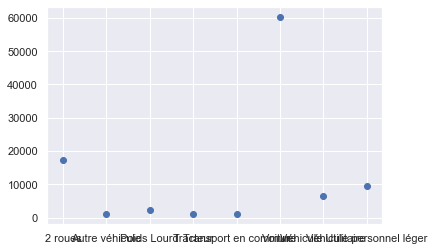

In [53]:
def name_plot():
    data = dfAccident2018vehicules.groupby(['gcat']).Num_Acc.count()
    
    plt.scatter(data.index, data.values)
    
name_plot()